<a href="https://www.kaggle.com/code/duynguyen2/eda-previous-application?scriptVersionId=110297844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


# 1. Reading data

In [2]:
previous_application = pd.read_csv("../input/home-credit-default-risk/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [4]:
description = pd.read_csv("../input/home-credit-default-risk/HomeCredit_columns_description.csv", encoding= "ISO-8859-1")

In [5]:
description = description[description["Table"] == "previous_application.csv"][["Row", "Description"]]

In [6]:
description

,Row,Description
173,SK_ID_PREV,ID of previous credit in Home credit related t...
174,SK_ID_CURR,ID of loan in our sample
175,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa..."
176,AMT_ANNUITY,Annuity of previous application
177,AMT_APPLICATION,For how much credit did client ask on the prev...
178,AMT_CREDIT,Final credit amount on the previous applicatio...
179,AMT_DOWN_PAYMENT,Down payment on the previous application
180,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...
181,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...
182,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...


In [7]:
def search_description(name):
    return description[description["Row"] == name].values

In [8]:
search_description("DAYS_TERMINATION")

array([['DAYS_TERMINATION',
        'Relative to application date of current application when was the expected termination of the previous application']],
      dtype=object)

In [9]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df)) *100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
check_missing_data(previous_application)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


Let's drop RATE_INTEREST_PRIVILEGED	 and RATE_INTEREST_PRIMARY because almost all of them is null

In [12]:
previous_application = previous_application.drop(["RATE_INTEREST_PRIVILEGED", "RATE_INTEREST_PRIMARY"], axis = 1)


In [13]:
previous_application.duplicated().sum()

0

In [14]:
previous_application.describe(include = np.number)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [15]:
previous_application["NAME_CONTRACT_STATUS"] = previous_application["NAME_CONTRACT_STATUS"].astype("category")

In [16]:
gr_by_status = previous_application.groupby("NAME_CONTRACT_STATUS")
mean_amount_status = gr_by_status.mean()[["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_DOWN_PAYMENT", "AMT_GOODS_PRICE"]]

In [17]:
mean_amount_status.columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE'],
      dtype='object')

In [18]:
mean_amount_status

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE
NAME_CONTRACT_STATUS,,,,,
Approved,14720.350105,180567.000949,202564.182131,6862.640909,188348.698834
Canceled,30289.763892,22730.011481,24187.057127,31181.777216,668893.339078
Refused,20498.160274,331760.510938,371689.841222,7103.541914,380452.993018
Unused offer,10145.798635,69760.732970,69783.990800,1.078207,69773.929734


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AMT_DOWN_PAYMENT'>

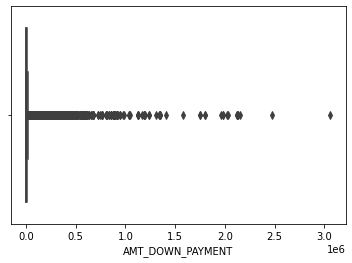

In [19]:
sns.boxplot(previous_application["AMT_DOWN_PAYMENT"])

<AxesSubplot:>

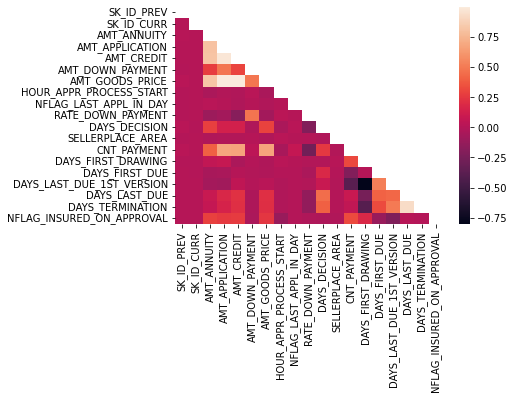

In [20]:
mask = np.triu(np.ones_like(previous_application.corr()))
sns.heatmap(previous_application.corr(), mask = mask)

In [21]:
def find_high_corr_pair(df):
    corr_matrix = df.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    temp = []
    for col in upper.columns:
        for ind in upper.index:
            if upper.loc[ind, col] > 0.8:
                temp.append((col, ind))
    return temp

In [22]:
high_corr = find_high_corr_pair(previous_application)
print(high_corr)

[('AMT_APPLICATION', 'AMT_ANNUITY'), ('AMT_CREDIT', 'AMT_ANNUITY'), ('AMT_CREDIT', 'AMT_APPLICATION'), ('AMT_GOODS_PRICE', 'AMT_ANNUITY'), ('AMT_GOODS_PRICE', 'AMT_APPLICATION'), ('AMT_GOODS_PRICE', 'AMT_CREDIT'), ('DAYS_TERMINATION', 'DAYS_LAST_DUE')]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
to_drop = ["AMT_APPLICATION", 'DAYS_LAST_DUE', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
previous_application.drop(to_drop, axis = 1, inplace = True)


In [24]:
high_corr = find_high_corr_pair(previous_application)
print(high_corr)

[]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


# Data processing

In [25]:
def plot_numeric_dist(table, column):
    fig, ax = plt.subplots(figsize=(8,5))
    ax = sns.boxplot(previous_application[column], color= 'g')

def plot_numeric_dist_log(table, column):
    fig, ax = plt.subplots(figsize=(8,5))
    ax = sns.boxplot(np.log1p(table[column]), color= 'g').set(title=f"Distribution of {column}")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


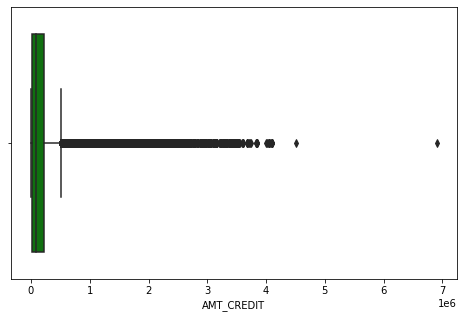

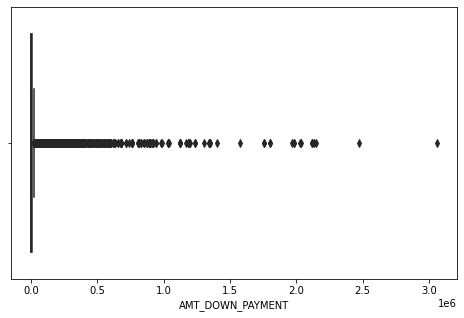

In [26]:
for i in ["AMT_CREDIT", "AMT_DOWN_PAYMENT"]:
    plot_numeric_dist(previous_application, i)

We can see all the values for the amount columns have outliers, however, the case that price of a good or the amount of credit is exceptionally high is possible and may not be due to error in data entry, therefore, we cannot drop these values. Instead, we can transform these columns to log scale to make it more normally distributed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


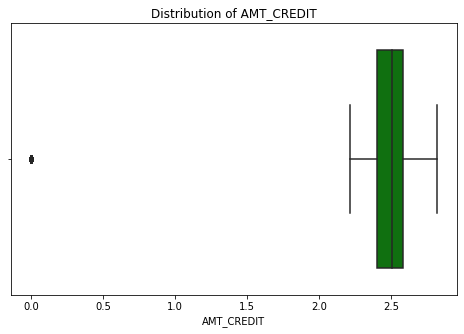

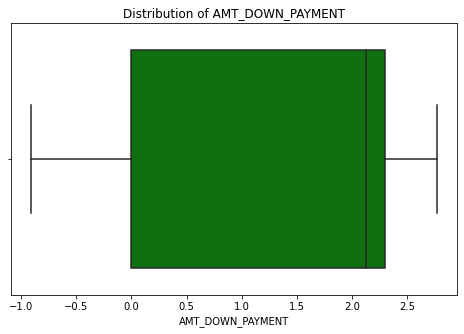

In [27]:
for i in ["AMT_CREDIT", "AMT_DOWN_PAYMENT"]:
    previous_application[i] = np.log1p(previous_application[i])
    plot_numeric_dist_log(previous_application, i)
    previous_application.rename(columns={i: "log_" + i}, inplace = True)

In [28]:
previous_application.head()
    

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,log_AMT_CREDIT,log_AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,9.749520,0.0,SATURDAY,15,Y,1,0.0,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-37.0,0.0
1,2802425,108129,Cash loans,13.429366,NaN,THURSDAY,11,Y,1,NaN,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,11.823681,NaN,TUESDAY,11,Y,1,NaN,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,13.062170,NaN,MONDAY,7,Y,1,NaN,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-177.0,1.0
4,1784265,202054,Cash loans,12.909309,NaN,THURSDAY,9,Y,1,NaN,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


# Exploring previous application

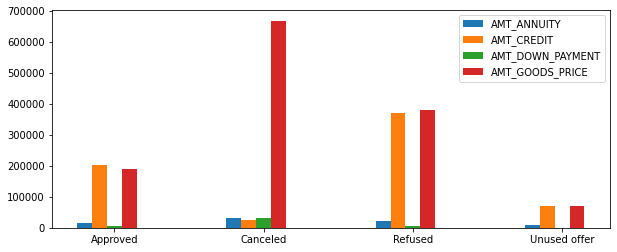

In [29]:
fig, ax = plt.subplots(figsize = (10, 4))
x = mean_amount_status.index
x_axis = np.arange(len(mean_amount_status.index))
y = ["AMT_ANNUITY", "AMT_CREDIT", "AMT_DOWN_PAYMENT", "AMT_GOODS_PRICE"]
for i in range(len(y)):
    ax.bar(x_axis -0.2 + (i*0.1), mean_amount_status[y[i]], width=0.1, label = y[i])
plt.xticks(x_axis, x)
plt.legend()

Cancelled applications have high goods price

## Contract status distribution in previously filed application

Text(0.5, 1.0, 'Percentage of status from previous applicants')

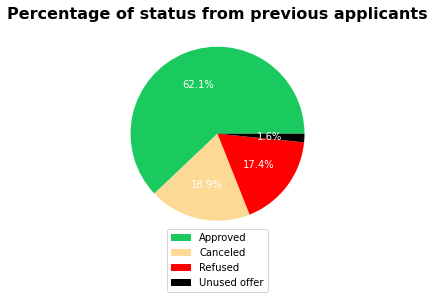

In [30]:
fig, ax = plt.subplots(figsize = (10,4))
perc_status = previous_application["NAME_CONTRACT_STATUS"].value_counts(normalize = True)
ax.pie(perc_status.values, labels = perc_status.index, colors = ["#1bca5f", "#fcd994", "red", "black"], autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25))
ax.set_title("Percentage of status from previous applicants", size = 16, weight = "bold")

## Do different contract type have different status distribution

In [31]:
def delete_spine2(ax):
    for i in ["top", "right"]:
        ax.spines[i].set_visible(False)

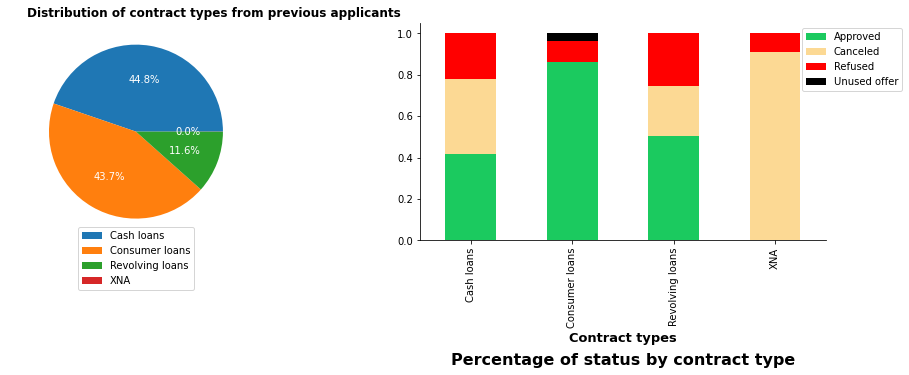

In [32]:
fig, (ax1, ax) = plt.subplots(ncols = 2, figsize = (16, 4))
perc_type = previous_application["NAME_CONTRACT_TYPE"].value_counts(normalize = True)
ax1.pie(perc_type.values, labels = perc_type.index, autopct='%1.1f%%', textprops=dict(color="w"))
ax1.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25))
ax1.set_title("Distribution of contract types from previous applicants", size = 12, weight = "bold", loc = "left")
gr_by_type = previous_application.groupby("NAME_CONTRACT_TYPE")
perc_status_by_type = gr_by_type["NAME_CONTRACT_STATUS"].apply(lambda x:pd.value_counts(x, normalize = True))
temp = pd.DataFrame(perc_status_by_type).unstack()
temp.plot(kind = "bar", ax= ax, stacked = True, color = ["#1bca5f", "#fcd994", "red", "black"])
ax.legend(["Approved", "Canceled", "Refused", "Unused offer"],loc = "upper right", bbox_to_anchor=(1.2, 1))
ax.set_title("Percentage of status by contract type", size = 16, weight = "bold", y = -0.6)
ax.set_xlabel("Contract types", size = 13, weight = "bold")
delete_spine2(ax)

Consumers loan has higher approve rate than any other contract types, also cash loans and revolving loans has high refusal rate

## Do repeating clients more likely to get rejected?

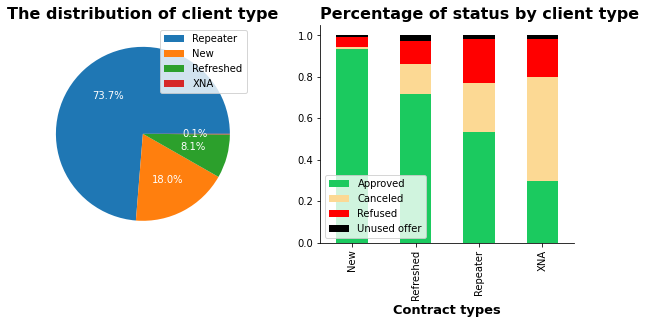

In [33]:
fig, (ax1, ax) = plt.subplots(ncols = 2, figsize = (10, 4))
temp = previous_application["NAME_CLIENT_TYPE"].value_counts()
ax1.pie(temp.values, labels = temp.index, autopct='%1.1f%%', textprops=dict(color="w"))
ax1.legend()
ax1.set_title("The distribution of client type", size = 16, weight = "bold")
gr_by_type = previous_application.groupby("NAME_CLIENT_TYPE")
perc_status_by_type = gr_by_type["NAME_CONTRACT_STATUS"].apply(lambda x:pd.value_counts(x, normalize = True))
temp = pd.DataFrame(perc_status_by_type).unstack()
temp.plot(kind = "bar", ax= ax, stacked = True, color = ["#1bca5f", "#fcd994", "red", "black"])
ax.legend(["Approved", "Canceled", "Refused", "Unused offer"],loc = 'best')
ax.set_title("Percentage of status by client type", size = 16, weight = "bold", loc = "left")
ax.set_xlabel("Contract types", size = 13, weight = "bold")
delete_spine2(ax)

Text(0, 0.5, 'Number of applications')

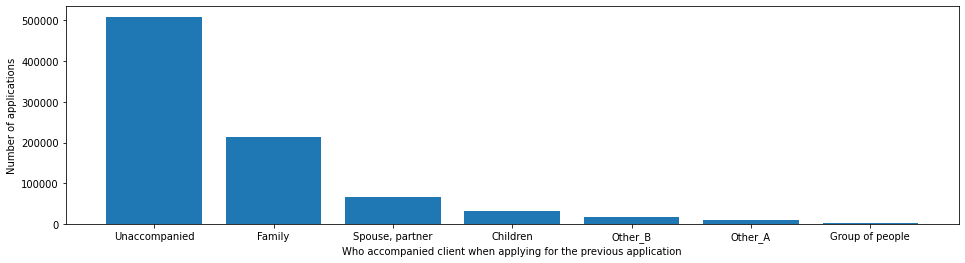

In [34]:
fig, ax = plt.subplots(figsize = (16, 4))
count_suite = previous_application["NAME_TYPE_SUITE"].value_counts()
ax.bar(count_suite.index, count_suite.values)
ax.set_xlabel("Who accompanied client when applying for the previous application")
ax.set_ylabel("Number of applications")

In [35]:
description[description["Row"] == "NAME_TYPE_SUITE"]["Description"].values

array(['Who accompanied client when applying for the previous application'],
      dtype=object)

Text(0.5, 0, 'Name of industry')

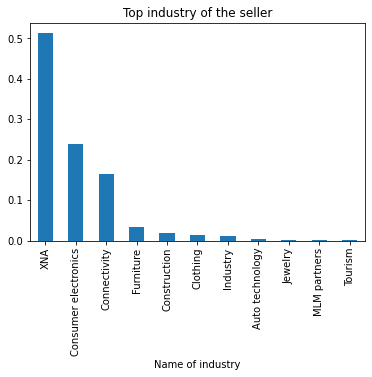

In [36]:
ax = previous_application["NAME_SELLER_INDUSTRY"].value_counts(normalize = True).plot(kind = "bar")
ax.set_title("Top industry of the seller")
ax.set_xlabel("Name of industry")

## Number of applications by time and hours

Text(0, 0.5, 'Number of applications')

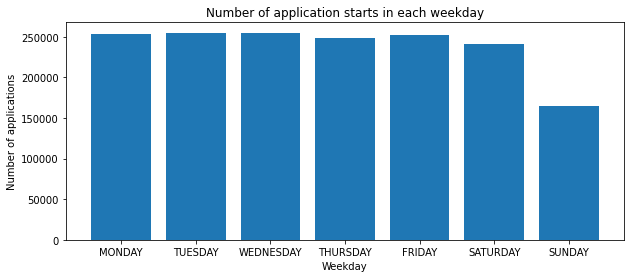

In [37]:
previous_application['WEEKDAY_APPR_PROCESS_START'] = pd.Categorical(previous_application['WEEKDAY_APPR_PROCESS_START'], ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY","SATURDAY", "SUNDAY"])
count_wd = previous_application['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(count_wd.index, count_wd.values)
ax.set_xlabel("Weekday")
ax.set_title("Number of application starts in each weekday")
ax.set_ylabel("Number of applications")


<BarContainer object of 1 artists>

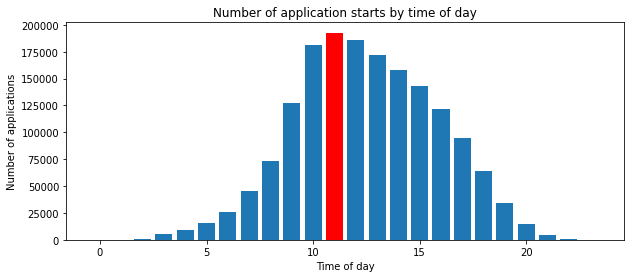

In [38]:
count_h = previous_application["HOUR_APPR_PROCESS_START"].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(count_h.index, count_h.values)
ax.set_xlabel("Time of day")
ax.set_title("Number of application starts by time of day")
ax.set_ylabel("Number of applications")
ax.bar(count_h.index[11], count_h.values[11], color = "red")

## Days of installment to repay the debt

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CNT_PAYMENT'>

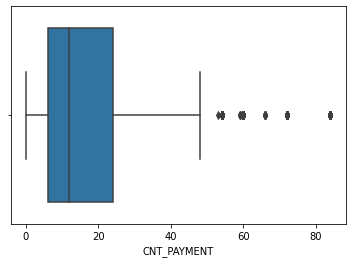

In [39]:
sns.boxplot(previous_application["CNT_PAYMENT"])

In [40]:
for i in ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_TERMINATION"]:
    temp = previous_application[previous_application[i]> 0][i]
    print(temp.unique(), len(temp))

[365243.] 934444
[365243.] 40645
[365243.] 225913


Because in "DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_TERMINATION" columns the only positive values is 365243 (in the future), we can ignore these values

In [41]:
perc_outliers_DAYS_FIRST_DRAWING = len(previous_application.loc[previous_application["DAYS_FIRST_DRAWING"] > 0]) / len(previous_application)
perc_outliers_DAYS_FIRST_DUE = len(previous_application.loc[previous_application["DAYS_FIRST_DUE"] > 0]) / len(previous_application)
perc_outliers_DAYS_TERMINATION = len(previous_application.loc[previous_application["DAYS_TERMINATION"] > 0]) / len(previous_application)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


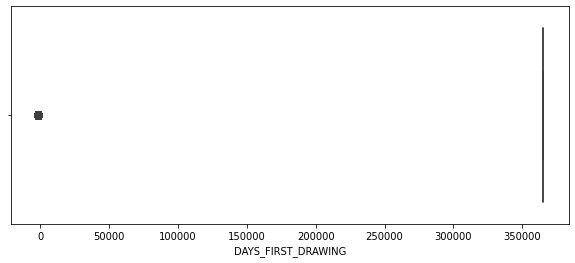

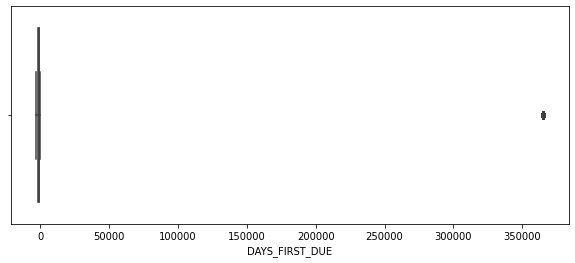

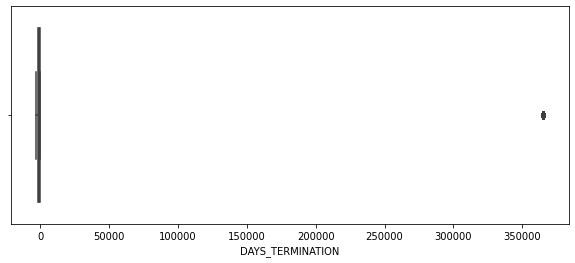

In [42]:
for i in ["DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_TERMINATION"]:
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(previous_application[i])

In [43]:
print(f"ratio of 365243 values in DAYS_FIRST_DRAWING: {perc_outliers_DAYS_FIRST_DRAWING}")
print(f"ratio of 365243 values in DAYS_FIRST_DUE: {perc_outliers_DAYS_FIRST_DUE}")
print(f"ratio of 365243 values in DAYS_TERMINATION: {perc_outliers_DAYS_TERMINATION}")

ratio of 365243 values in DAYS_FIRST_DRAWING: 0.5594756121071911
ratio of 365243 values in DAYS_FIRST_DUE: 0.02433520494978488
ratio of 365243 values in DAYS_TERMINATION: 0.13525991280159308


We can only drop these values for DAYS_FIRST_DUE and DAYS_TERMINATION

In [44]:
previous_application.loc[previous_application["DAYS_FIRST_DUE"] > 0] = np.nan
previous_application.loc[previous_application["DAYS_TERMINATION"] > 0] = np.nan


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


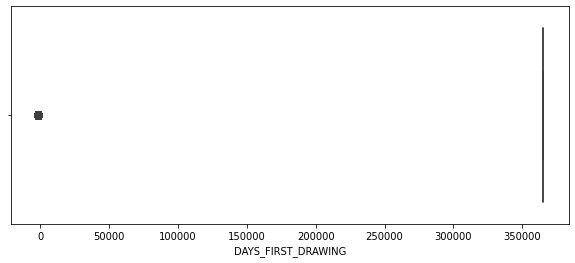

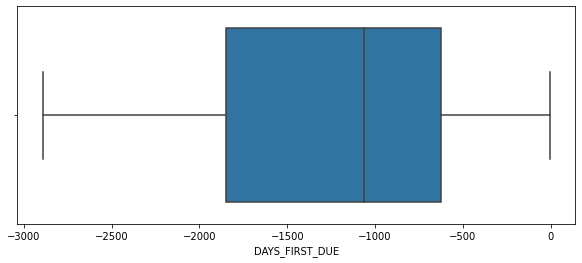

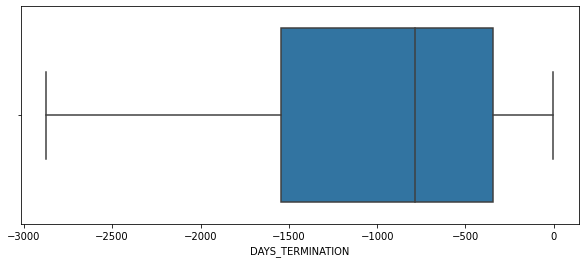

In [45]:
for i in ["DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_TERMINATION"]:
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(previous_application[i])

In [46]:
def plot_numeric_dist2(table, column):

    plt.figure(figsize=(12,5))
    plt.title(f"Distribution of {column}")
    ax = sns.distplot(table[table[column] < 0][column])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

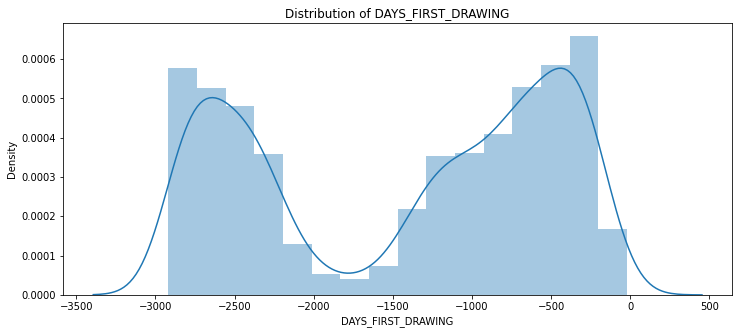

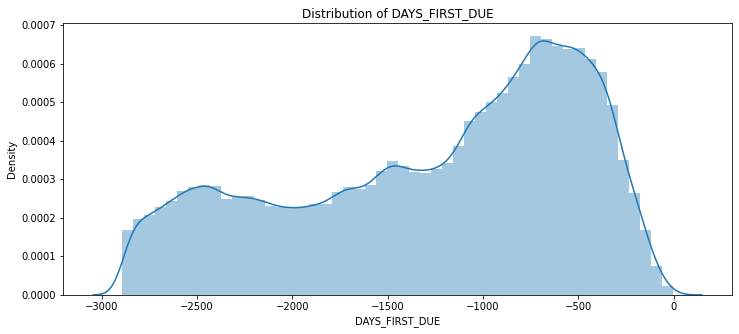

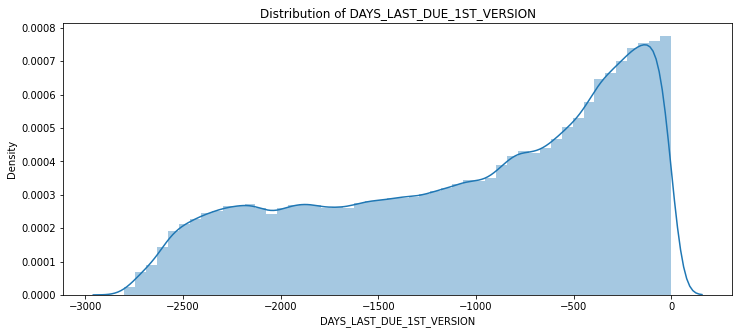

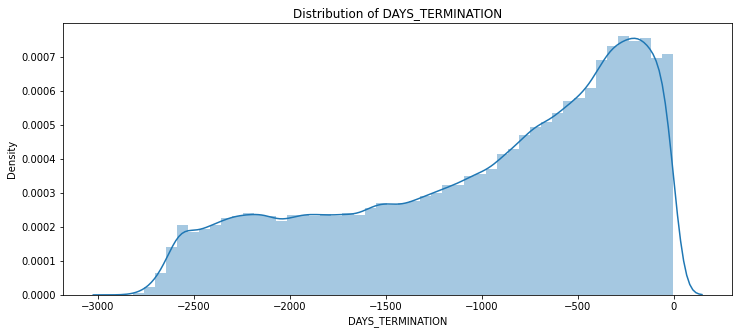

In [47]:
for i in ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_TERMINATION"]:
    plot_numeric_dist2(previous_application, i)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


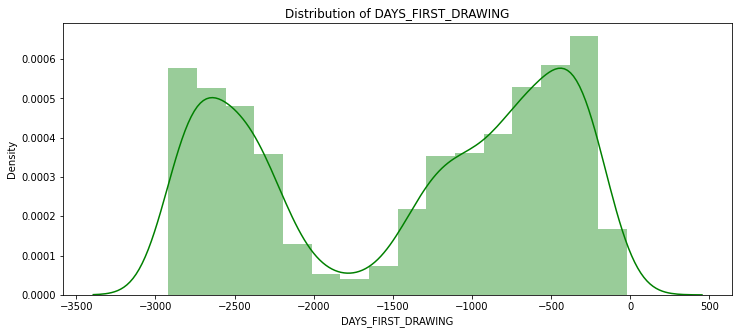

In [48]:

plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_FIRST_DRAWING")
ax = sns.distplot(previous_application[previous_application["DAYS_FIRST_DRAWING"] < 365243]["DAYS_FIRST_DRAWING"].dropna(), color= 'green')

**Because in almost all rows in this data, NFLAG_LAST_APPL_IN_DAY is 1 thus this features doesn't yield much insight, we can drop this feature**

In [49]:
search_description("FLAG_LAST_APPL_PER_CONTRACT")

array([['FLAG_LAST_APPL_PER_CONTRACT',
        'Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract']],
      dtype=object)

In [50]:
search_description("NFLAG_LAST_APPL_IN_DAY")

array([['NFLAG_LAST_APPL_IN_DAY',
        'Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice']],
      dtype=object)

In [51]:
search_description("NFLAG_INSURED_ON_APPROVAL")

array([['NFLAG_INSURED_ON_APPROVAL',
        'Did the client requested insurance during the previous application']],
      dtype=object)

<AxesSubplot:>

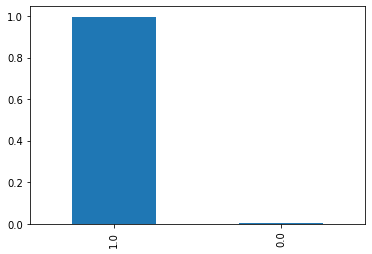

In [52]:
previous_application["NFLAG_LAST_APPL_IN_DAY"].value_counts(normalize = True).plot(kind = "bar")

<AxesSubplot:>

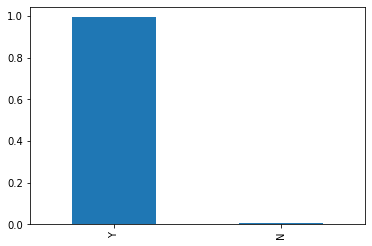

In [53]:
previous_application['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize = True).plot(kind = "bar")

<AxesSubplot:>

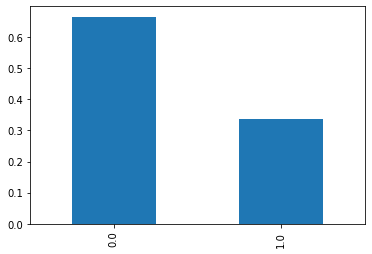

In [54]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize = True).plot(kind = "bar")

In [55]:
# previous_application.drop(["NFLAG_LAST_APPL_IN_DAY", 'FLAG_LAST_APPL_PER_CONTRACT'], axis = 1, inplace = True)

In [56]:
previous_application['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1430773
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [57]:
previous_application[previous_application['FLAG_LAST_APPL_PER_CONTRACT'] == "N"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,log_AMT_CREDIT,log_AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
277,2770539.0,185661.0,Revolving loans,12.100718,NaN,THURSDAY,11.0,N,0.0,NaN,...,2024.0,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
366,2139354.0,388401.0,Revolving loans,13.279369,NaN,THURSDAY,15.0,N,1.0,NaN,...,5.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
468,2470545.0,148658.0,Revolving loans,11.967187,NaN,FRIDAY,9.0,N,1.0,NaN,...,4.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
482,2319125.0,218182.0,Revolving loans,13.710151,NaN,TUESDAY,12.0,N,0.0,NaN,...,-1.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
503,2195939.0,340546.0,Revolving loans,11.119898,NaN,SUNDAY,13.0,N,1.0,NaN,...,71.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668202,1790442.0,404498.0,Revolving loans,12.100718,NaN,SATURDAY,8.0,N,1.0,NaN,...,3324.0,Furniture,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1668506,1341321.0,152116.0,Revolving loans,12.100718,NaN,THURSDAY,10.0,N,0.0,NaN,...,38.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1668507,2468578.0,343076.0,Revolving loans,11.967187,NaN,WEDNESDAY,13.0,N,0.0,NaN,...,38.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1669593,2063794.0,225535.0,Revolving loans,12.660331,NaN,WEDNESDAY,9.0,N,0.0,NaN,...,-1.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN


In [58]:
previous_application["SK_ID_PREV"].value_counts().sort_values()

2030495.0    1
2315218.0    1
1656711.0    1
2367563.0    1
2579447.0    1
            ..
1534841.0    1
1755809.0    1
2406354.0    1
1556789.0    1
2418762.0    1
Name: SK_ID_PREV, Length: 1439248, dtype: int64

In [59]:
previous_application.to_csv('./clean_previous_application.csv')

In [60]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'log_AMT_CREDIT',
       'log_AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [61]:
previous_application["NFLAG_LAST_APPL_IN_DAY"].value_counts()

1.0    1433530
0.0       5718
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [62]:
previous_application[previous_application['FLAG_LAST_APPL_PER_CONTRACT'] == "N"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,log_AMT_CREDIT,log_AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
277,2770539.0,185661.0,Revolving loans,12.100718,NaN,THURSDAY,11.0,N,0.0,NaN,...,2024.0,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
366,2139354.0,388401.0,Revolving loans,13.279369,NaN,THURSDAY,15.0,N,1.0,NaN,...,5.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
468,2470545.0,148658.0,Revolving loans,11.967187,NaN,FRIDAY,9.0,N,1.0,NaN,...,4.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
482,2319125.0,218182.0,Revolving loans,13.710151,NaN,TUESDAY,12.0,N,0.0,NaN,...,-1.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN
503,2195939.0,340546.0,Revolving loans,11.119898,NaN,SUNDAY,13.0,N,1.0,NaN,...,71.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668202,1790442.0,404498.0,Revolving loans,12.100718,NaN,SATURDAY,8.0,N,1.0,NaN,...,3324.0,Furniture,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1668506,1341321.0,152116.0,Revolving loans,12.100718,NaN,THURSDAY,10.0,N,0.0,NaN,...,38.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1668507,2468578.0,343076.0,Revolving loans,11.967187,NaN,WEDNESDAY,13.0,N,0.0,NaN,...,38.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN
1669593,2063794.0,225535.0,Revolving loans,12.660331,NaN,WEDNESDAY,9.0,N,0.0,NaN,...,-1.0,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN


In [63]:
previous_application["SK_ID_PREV"].value_counts()

2030495.0    1
1968173.0    1
2167286.0    1
1738369.0    1
2479750.0    1
            ..
1857453.0    1
1567772.0    1
2159820.0    1
2306930.0    1
2418762.0    1
Name: SK_ID_PREV, Length: 1439248, dtype: int64